In [3]:
from causalkit.data import CausalDatasetGenerator, CausalData
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Example Datasets with CausalDatasetGenerator

This notebook demonstrates how to generate synthetic datasets for causal inference using the `CausalDatasetGenerator` class. We'll explore different configurations to showcase the flexibility of the generator.


## Example 1: Continuous Outcome

This example demonstrates generating data with a continuous outcome and linear effects.


In [4]:
# Example 1: Continuous outcome
gen_continuous = CausalDatasetGenerator(
    theta=2.0,                       # constant treatment effect of +2
    beta_y=np.array([1.0, -0.5, 0.2]),  # linear effects of confounders on outcome
    beta_t=np.array([0.8, 1.2, -0.3]),  # linear effects of confounders on treatment
    target_t_rate=0.35,              # ~35% treated on average
    outcome_type="continuous",       # continuous outcome
    sigma_y=1.0,                     # standard deviation of outcome noise
    seed=42,
    confounder_specs=[
        {"name": "age", "dist": "normal", "mu": 50, "sd": 10},
        {"name": "smoker", "dist": "bernoulli", "p": 0.3},
        {"name": "bmi", "dist": "normal", "mu": 27, "sd": 4},
    ])
df_continuous = gen_continuous.generate(10_000)
print("Generated columns:", df_continuous.columns.tolist())
print(f"Treatment rate: {df_continuous['t'].mean():.3f}")
print(f"Average treatment effect (ATE): {df_continuous['cate'].mean():.3f}")
df_continuous.head()


Generated columns: ['y', 't', 'age', 'smoker', 'bmi', 'propensity', 'mu0', 'mu1', 'cate']
Treatment rate: 0.353
Average treatment effect (ATE): 2.000


,y,t,age,smoker,bmi,propensity,mu0,mu1,cate
0,60.057239,1.0,53.047171,1.0,20.651225,8.992087e-01,56.677416,58.677416,2.0
1,47.379975,0.0,39.600159,0.0,32.502713,1.633812e-06,46.100702,48.100702,2.0
2,65.457219,1.0,57.504512,1.0,32.180623,9.085050e-01,63.440637,65.440637,2.0
3,69.484632,1.0,59.405647,0.0,35.945336,8.156292e-01,66.594714,68.594714,2.0
4,35.681310,0.0,30.489648,0.0,31.046206,1.728435e-09,36.698889,38.698889,2.0


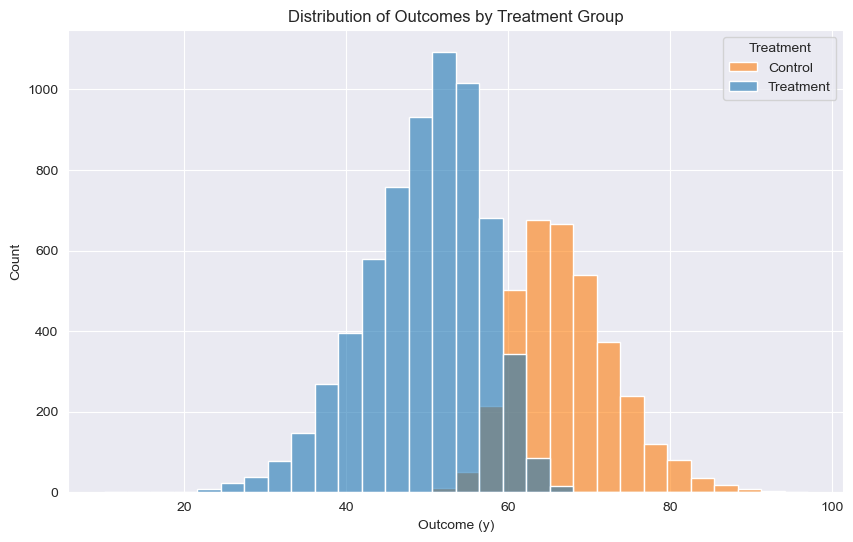

In [5]:
# Visualize the distribution of outcomes by treatment group
plt.figure(figsize=(10, 6))
sns.histplot(data=df_continuous, x='y', hue='t', bins=30, alpha=0.6)
plt.title('Distribution of Outcomes by Treatment Group')
plt.xlabel('Outcome (y)')
plt.ylabel('Count')
plt.legend(title='Treatment', labels=['Control', 'Treatment'])
plt.show()


## Example 2: Binary Outcome

This example demonstrates generating data with a binary outcome, where the treatment effect is on the log-odds scale.


In [6]:
# Example 2: Binary outcome
gen_binary = CausalDatasetGenerator(
    theta=0.8,                       # treatment effect on log-odds scale
    beta_y=np.array([0.5, -0.3, 0.1]),  # effects on log-odds of outcome
    beta_t=np.array([0.4, 0.6, -0.2]),  # effects on log-odds of treatment
    target_t_rate=0.4,               # ~40% treated on average
    outcome_type="binary",           # binary outcome
    seed=43,
    confounder_specs=[
        {"name": "age", "dist": "normal", "mu": 45, "sd": 15},
        {"name": "income", "dist": "normal", "mu": 50000, "sd": 20000},
        {"name": "education", "dist": "bernoulli", "p": 0.4},
    ])
df_binary = gen_binary.generate(10_000)
print("Generated columns:", df_binary.columns.tolist())
print(f"Treatment rate: {df_binary['t'].mean():.3f}")
print(f"Outcome rate: {df_binary['y'].mean():.3f}")
print(f"Average treatment effect (ATE): {df_binary['cate'].mean():.3f}")
df_binary.head()


Generated columns: ['y', 't', 'age', 'income', 'education', 'propensity', 'mu0', 'mu1', 'cate']
Treatment rate: 0.994
Outcome rate: 0.006
Average treatment effect (ATE): 0.000


/Users/ioannmartynov/PycharmProjects/Ckit/causalkit/data/generators.py:29: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


,y,t,age,income,education,propensity,mu0,mu1,cate
0,0.0,1.0,48.663443,55859.656793,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,55.172675,50556.059822,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,36.217059,49334.856647,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,31.369903,55031.313531,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,15.122427,38706.807349,0.0,1.0,0.0,0.0,0.0


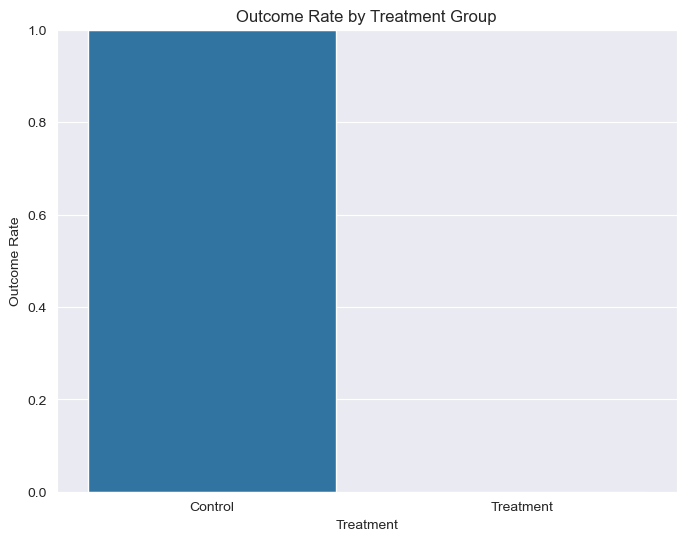

In [7]:
# Visualize the outcome rates by treatment group
outcome_by_treatment = df_binary.groupby('t')['y'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=outcome_by_treatment, x='t', y='y')
plt.title('Outcome Rate by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Outcome Rate')
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.ylim(0, 1)
plt.show()


## Example 3: Poisson Outcome

This example demonstrates generating data with a Poisson outcome, where the treatment effect is on the log-mean scale.


In [8]:
# Example 3: Poisson outcome
gen_poisson = CausalDatasetGenerator(
    theta=0.4,                       # treatment effect on log-mean scale
    beta_y=np.array([0.3, 0.2]),     # effects on log-mean of outcome
    beta_t=np.array([0.5, -0.3]),    # effects on log-odds of treatment
    target_t_rate=0.3,               # ~30% treated on average
    outcome_type="poisson",          # poisson outcome
    seed=44,
    confounder_specs=[
        {"name": "exposure", "dist": "uniform", "a": 0, "b": 10},
        {"name": "risk_factor", "dist": "bernoulli", "p": 0.25},
    ])
df_poisson = gen_poisson.generate(10_000)
print("Generated columns:", df_poisson.columns.tolist())
print(f"Treatment rate: {df_poisson['t'].mean():.3f}")
print(f"Average outcome: {df_poisson['y'].mean():.3f}")
print(f"Average treatment effect (ATE): {df_poisson['cate'].mean():.3f}")
df_poisson.head()


Generated columns: ['y', 't', 'exposure', 'risk_factor', 'propensity', 'mu0', 'mu1', 'cate']
Treatment rate: 0.304
Average outcome: 8.352
Average treatment effect (ATE): 3.289


,y,t,exposure,risk_factor,propensity,mu0,mu1,cate
0,2.0,0.0,1.225655,1.0,0.034321,1.764199,2.631875,0.867676
1,1.0,0.0,2.581131,0.0,0.086326,2.169158,3.236004,1.066846
2,1.0,0.0,4.057707,1.0,0.127745,4.126016,6.155292,2.029276
3,25.0,1.0,9.691839,0.0,0.767816,18.311913,27.318164,9.006251
4,2.0,0.0,1.623171,0.0,0.055288,1.627347,2.427717,0.800370


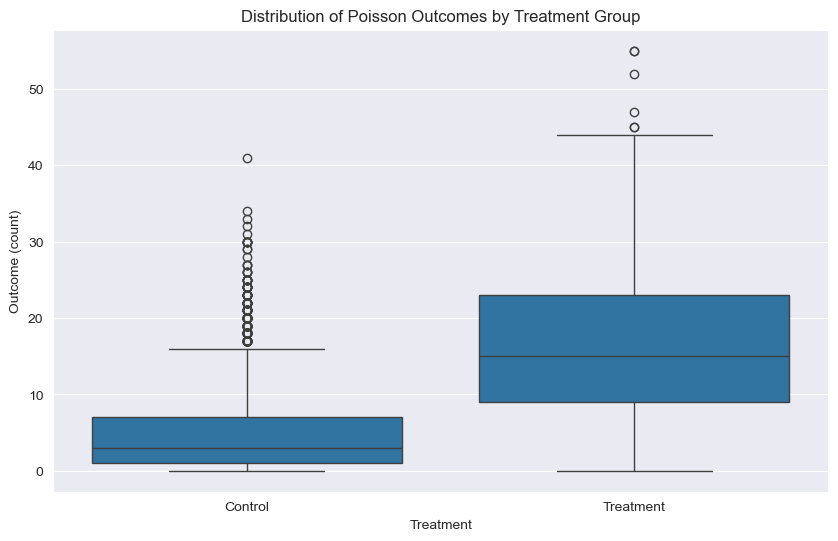

In [9]:
# Visualize the distribution of outcomes by treatment group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_poisson, x='t', y='y')
plt.title('Distribution of Poisson Outcomes by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Outcome (count)')
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.show()


## Example 4: Heterogeneous Treatment Effects

This example demonstrates generating data with heterogeneous treatment effects, where the effect varies based on the confounders.


In [10]:
# Example 4: Heterogeneous treatment effects
# Define a function for heterogeneous treatment effects
def heterogeneous_effect(X):
    # Treatment effect increases with age and is higher for smokers
    age_normalized = (X[:, 0] - 40) / 20  # Normalize age
    smoker = X[:, 1]                     # Smoker status
    return 1.0 + 0.5 * age_normalized + 0.8 * smoker

gen_het = CausalDatasetGenerator(
    tau=heterogeneous_effect,          # Function for heterogeneous effects
    beta_y=np.array([0.4, 0.6]),       # linear effects on outcome
    beta_t=np.array([0.3, 0.7]),       # linear effects on treatment
    target_t_rate=0.4,                 # ~40% treated on average
    outcome_type="continuous",         # continuous outcome
    sigma_y=0.8,                       # standard deviation of outcome noise
    seed=45,
    confounder_specs=[
        {"name": "age", "dist": "normal", "mu": 40, "sd": 15},
        {"name": "smoker", "dist": "bernoulli", "p": 0.3},
    ])
df_het = gen_het.generate(10_000)
print("Generated columns:", df_het.columns.tolist())
print(f"Treatment rate: {df_het['t'].mean():.3f}")
print(f"Average treatment effect (ATE): {df_het['cate'].mean():.3f}")
df_het.head()


Generated columns: ['y', 't', 'age', 'smoker', 'propensity', 'mu0', 'mu1', 'cate']
Treatment rate: 0.401
Average treatment effect (ATE): 1.246


,y,t,age,smoker,propensity,mu0,mu1,cate
0,12.912067,0.0,33.132022,0.0,0.029303,13.252809,14.081109,0.828301
1,12.185143,0.0,30.657120,0.0,0.014164,12.262848,13.029276,0.766428
2,17.039112,0.0,42.029350,0.0,0.303405,16.811740,17.862474,1.050734
3,24.466364,1.0,52.658539,1.0,0.955110,21.663416,23.779879,2.116463
4,14.851526,0.0,37.772520,0.0,0.108304,15.109008,16.053321,0.944313


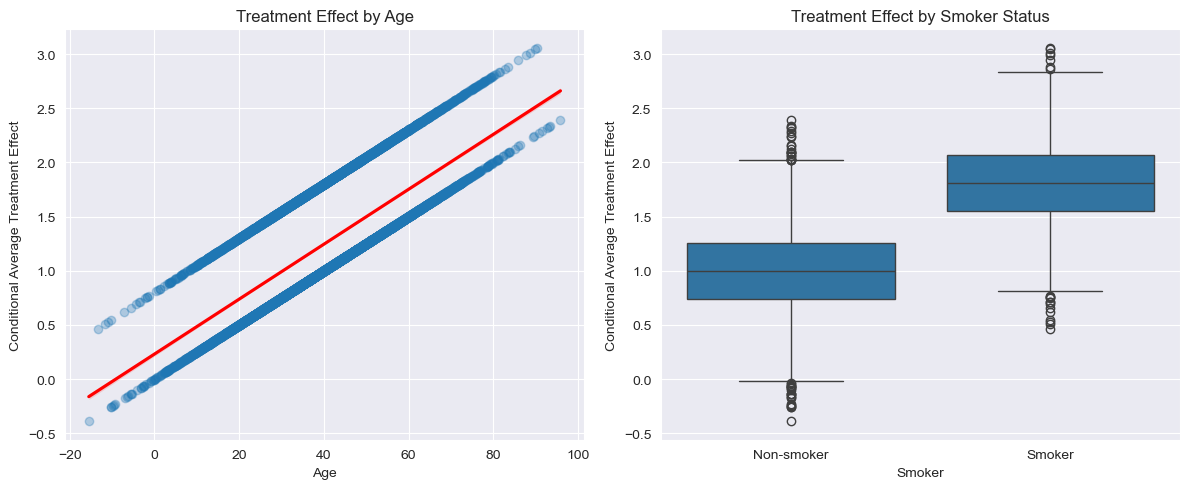

In [11]:
# Visualize the heterogeneous treatment effects
plt.figure(figsize=(12, 5))

# Effect by age
plt.subplot(1, 2, 1)
sns.regplot(data=df_het, x='age', y='cate', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Treatment Effect by Age')
plt.xlabel('Age')
plt.ylabel('Conditional Average Treatment Effect')

# Effect by smoker status
plt.subplot(1, 2, 2)
sns.boxplot(data=df_het, x='smoker', y='cate')
plt.title('Treatment Effect by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Conditional Average Treatment Effect')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'])

plt.tight_layout()
plt.show()


## Example 5: Unobserved Confounding

This example demonstrates generating data with unobserved confounding, where an unobserved variable affects both treatment assignment and outcome.


In [12]:
# Example 5: Unobserved confounding
gen_unobs = CausalDatasetGenerator(
    theta=1.5,                       # true treatment effect
    beta_y=np.array([0.5, -0.3]),    # observed confounder effects on outcome
    beta_t=np.array([0.4, 0.2]),     # observed confounder effects on treatment
    u_strength_y=0.8,                # effect of unobserved confounder on outcome
    u_strength_t=0.6,                # effect of unobserved confounder on treatment
    target_t_rate=0.4,               # ~40% treated on average
    outcome_type="continuous",       # continuous outcome
    sigma_y=1.0,                     # standard deviation of outcome noise
    seed=46,
    confounder_specs=[
        {"name": "x1", "dist": "normal", "mu": 0, "sd": 1},
        {"name": "x2", "dist": "normal", "mu": 0, "sd": 1},
    ])
df_unobs = gen_unobs.generate(10_000)
print("Generated columns:", df_unobs.columns.tolist())
print(f"Treatment rate: {df_unobs['t'].mean():.3f}")
print(f"Average treatment effect (ATE): {df_unobs['cate'].mean():.3f}")
df_unobs.head()


Generated columns: ['y', 't', 'x1', 'x2', 'propensity', 'mu0', 'mu1', 'cate']
Treatment rate: 0.406
Average treatment effect (ATE): 1.500


,y,t,x1,x2,propensity,mu0,mu1,cate
0,-0.895198,0.0,-0.502916,-0.574663,0.382017,0.311433,1.811433,1.5
1,-0.526285,1.0,1.217890,0.839602,0.344052,-0.766407,0.733593,1.5
2,-0.581677,0.0,-0.271119,-1.141463,0.304437,0.164539,1.664539,1.5
3,1.399877,0.0,0.730183,-0.037920,0.598440,1.139461,2.639461,1.5
4,1.485044,1.0,-1.169306,-0.876197,0.364421,0.404206,1.904206,1.5


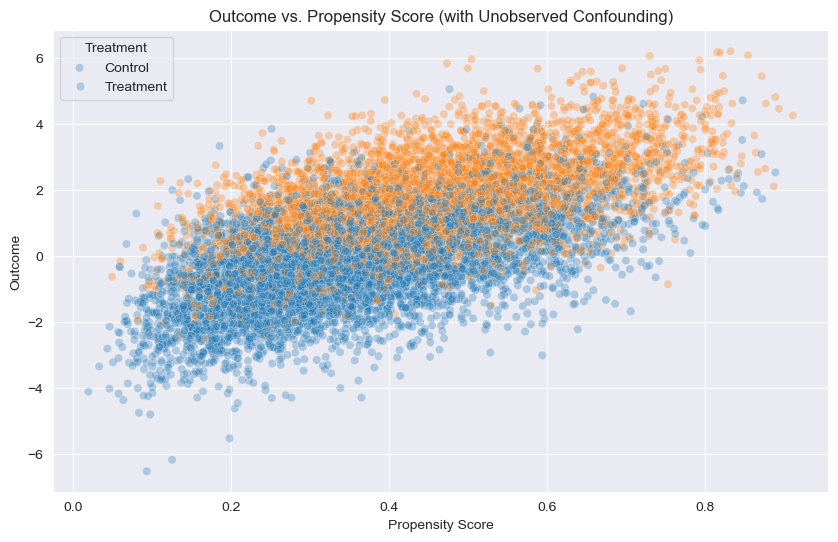

In [13]:
# Visualize the relationship between propensity and outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unobs, x='propensity', y='y', hue='t', alpha=0.3)
plt.title('Outcome vs. Propensity Score (with Unobserved Confounding)')
plt.xlabel('Propensity Score')
plt.ylabel('Outcome')
plt.legend(title='Treatment', labels=['Control', 'Treatment'])
plt.show()


## Example 6: Using to_causal_data Method

This example demonstrates how to convert the generated data to a CausalData object for use with other causalkit functions.


In [14]:
# Example 6: Using to_causal_data method
gen_causal = CausalDatasetGenerator(
    theta=1.2,                       # constant treatment effect
    beta_y=np.array([0.6, -0.4, 0.3]),  # linear effects on outcome
    beta_t=np.array([0.5, 0.3, -0.2]),  # linear effects on treatment
    target_t_rate=0.3,               # ~30% treated on average
    outcome_type="continuous",       # continuous outcome
    sigma_y=0.9,                     # standard deviation of outcome noise
    seed=47,
    confounder_specs=[
        {"name": "age", "dist": "normal", "mu": 35, "sd": 12},
        {"name": "income", "dist": "normal", "mu": 60000, "sd": 25000},
        {"name": "education", "dist": "bernoulli", "p": 0.5},
    ])

# Generate data and convert to CausalData
causal_data = gen_causal.to_causal_data(5000)

# Examine the CausalData object
print("CausalData object created with:")
print(f"  - {causal_data.df.shape[0]} observations")
print(f"  - Target column: {causal_data._target}")
print(f"  - Treatment column: {causal_data._treatment}")
print(f"  - Cofounder columns: {causal_data._cofounders}")

# Access data through CausalData methods
print("\nAccessing data through CausalData methods:")
print(f"Treatment mean: {causal_data.treatment.mean():.3f}")
print(f"Target mean: {causal_data.target.mean():.3f}")
print("\nFirst few rows of cofounders:")
causal_data.cofounders.head()


CausalData object created with:
  - 5000 observations
  - Target column: y
  - Treatment column: t
  - Cofounder columns: ['age', 'income', 'education']

Accessing data through CausalData methods:
Treatment mean: 0.993
Target mean: -23882.672

First few rows of cofounders:


/Users/ioannmartynov/PycharmProjects/Ckit/causalkit/data/generators.py:29: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


,age,income,education
0,27.002757,8866.261296,1.0
1,36.169412,90640.096063,0.0
2,12.204238,87670.530924,0.0
3,11.719163,65397.636859,0.0
4,18.073770,10879.250760,0.0


In [ ]:
# Using get_df method to get specific columns
treatment_and_age = causal_data.get_df(
    columns=['age'], 
    include_treatment=True, 
    include_target=False, 
    include_cofounders=False
)
print("Selected columns using get_df:")
treatment_and_age.head()